Course-End Project: Healthcare

In [58]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#check the head of the data
df = pd.read_excel('CVD.xlsx') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
#get the dtypes of the datasets 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
#check for null values, columnwise
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
#check for duplicates and get their index values
duplicate_row_index = df[df.duplicated()].index
duplicate_row_index

Int64Index([164], dtype='int64')

In [36]:
#drop duplicate values
df = df.drop(duplicate_row_index)

In [37]:
#statistical summary and the measures of central tendencies and spread of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [38]:
#countplots for the categorical variables (presented in the following cells)
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

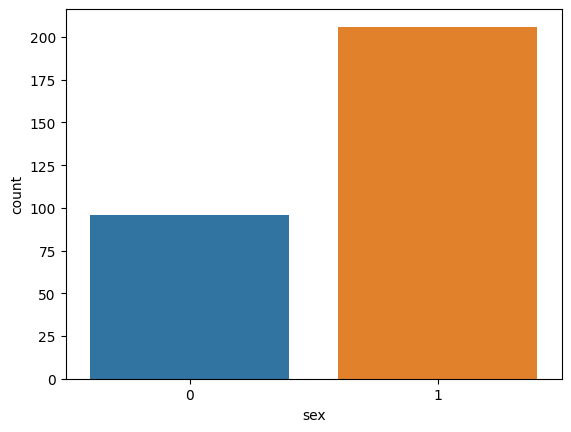

In [39]:
#Also,composition of all patients with respect to the Sex
sns.countplot(data = df, x = 'sex')

<AxesSubplot: xlabel='age', ylabel='count'>

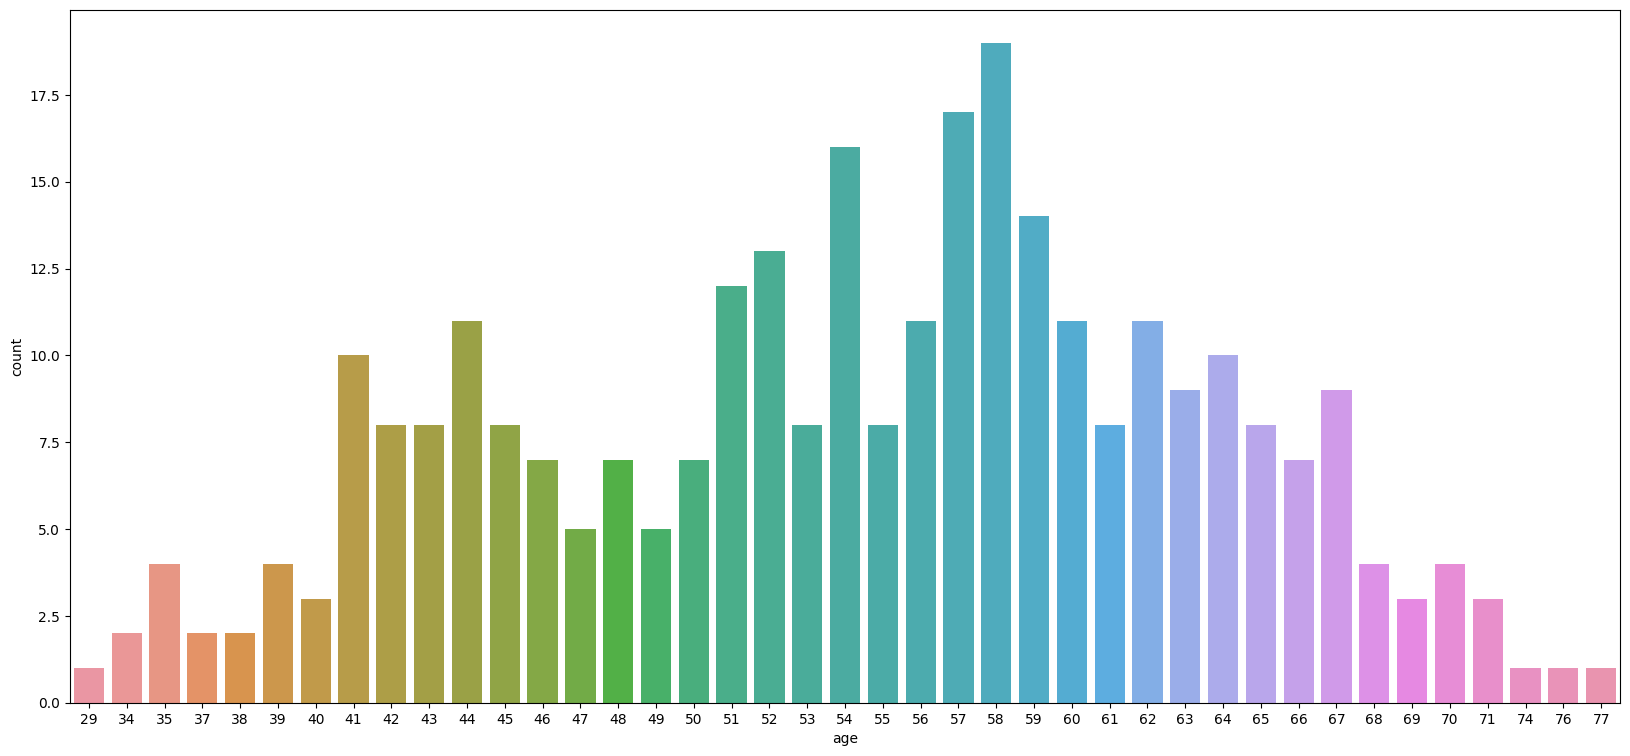

In [40]:
# Also, Occurrence of CVD across the Age 
plt.figure(figsize=(20,9))
sns.countplot(data = df, x ='age')

In [41]:
#mean age of males and females in the dataset
df.groupby('sex').mean('age')

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


<AxesSubplot: >

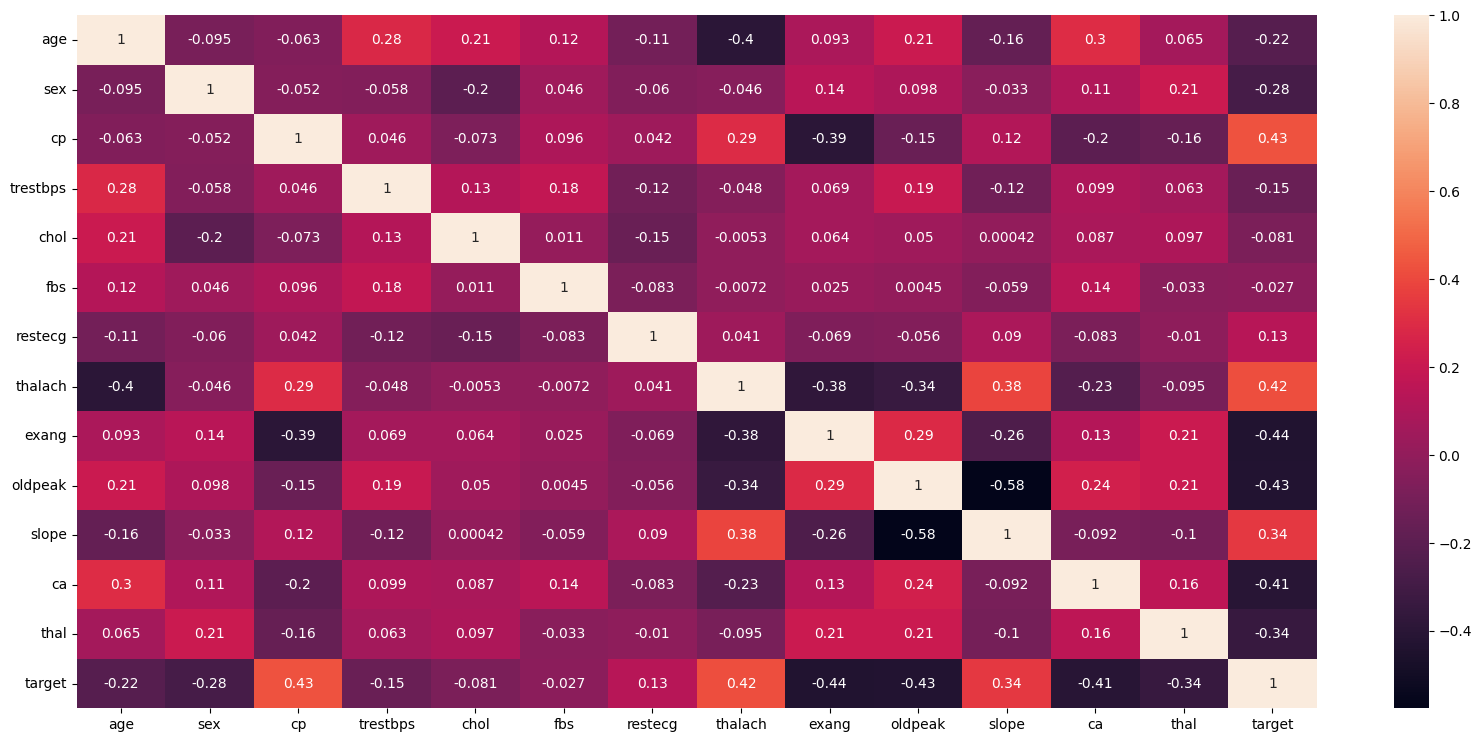

In [62]:
#relationship between all the factors and CVD
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot = True)

In [63]:
#pair plot to understand the relationship between all the given variables
sns.pairplot(data=df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EC6F916950> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot: >

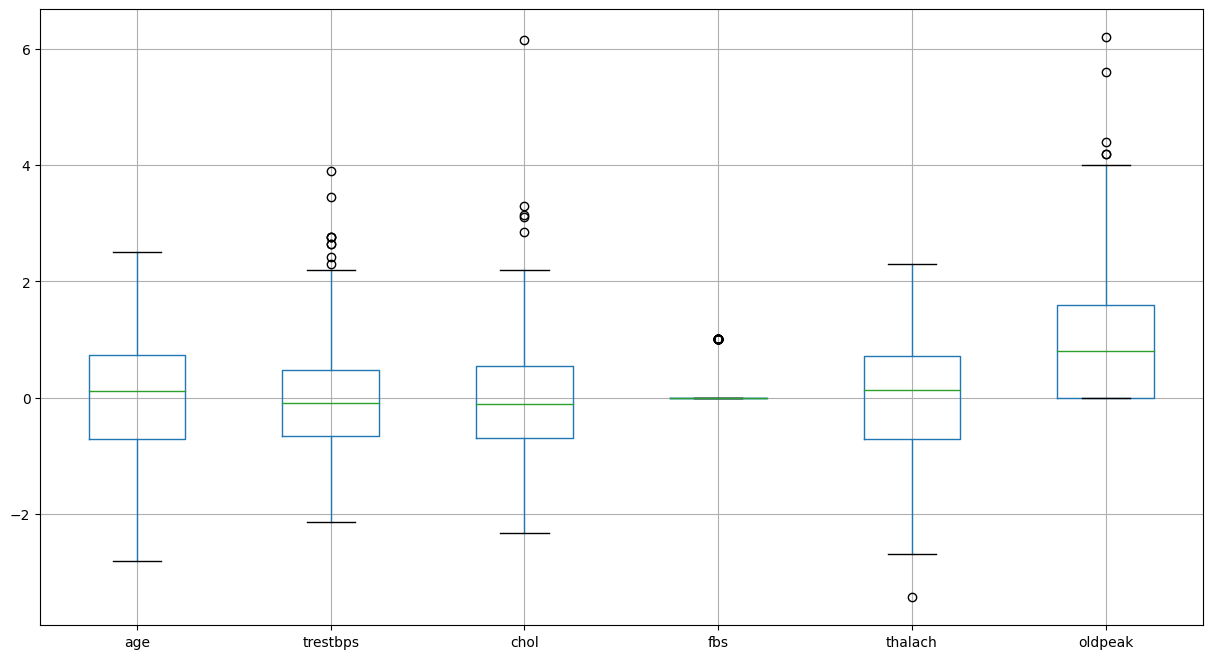

In [64]:
plt.figure(figsize=(15,8))
df.boxplot(column=['age','trestbps','chol','fbs','thalach','oldpeak']) 

In [69]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['trestbps','chol','thalach','oldpeak', 'fbs']:
    df[i]=handle_outliers(df[i])

<AxesSubplot: >

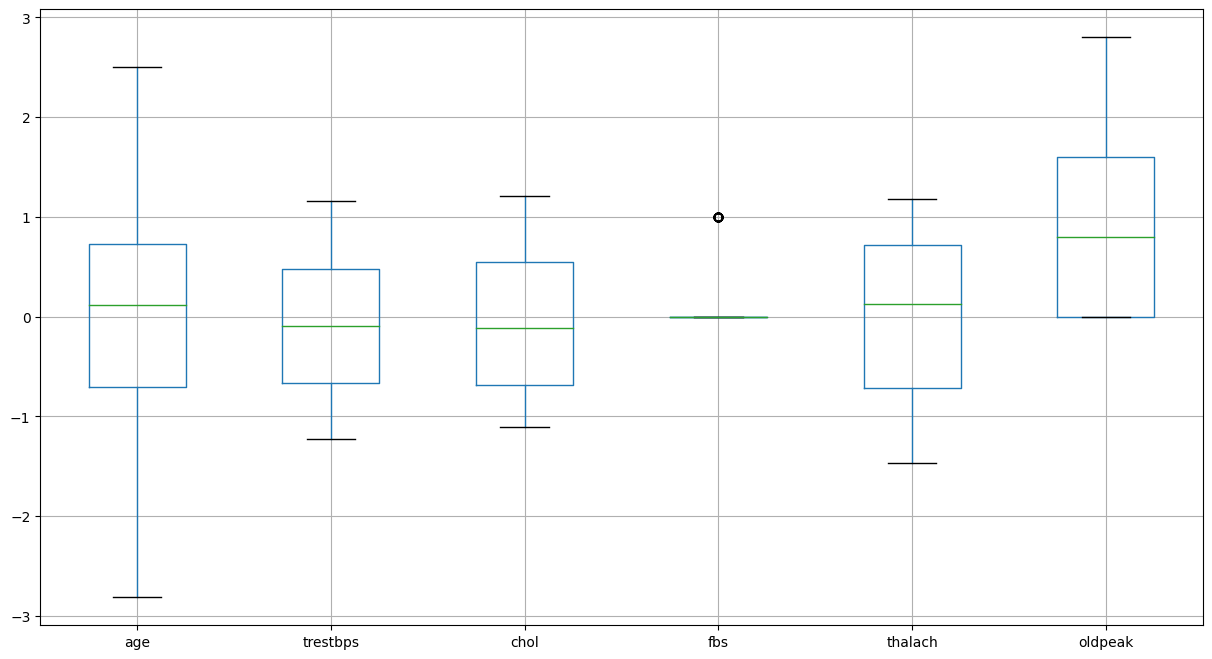

In [70]:
plt.figure(figsize=(15,8))
df.boxplot(column=['age','trestbps','chol','fbs','thalach','oldpeak']) 

In [71]:
#transforming the variables which have a higher value than the rest of the variables. 
cols = ['age','trestbps','chol','thalach']
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

df[cols] = scaler.fit_transform(df[cols])

In [72]:
#checking the data again
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,1.064668,-0.300923,1.0,0,0.002171,0,2.3,0,0,1,1
1,-1.928548,1,2,-0.038476,0.134491,0.0,1,1.357036,0,2.8,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.043688,0.0,0,1.128750,0,1.4,2,0,2,1
3,0.174856,1,1,-0.773906,-0.224085,0.0,1,1.357036,0,0.8,2,0,2,1
4,0.285561,0,0,-0.773906,1.638693,0.0,1,0.667877,1,0.6,2,0,2,1


In [73]:
#defining feature and target variables 
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [83]:
#splitting the data into train and test variables
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 6)

In [84]:
#check the shape of the data
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((211, 13), (91, 13), (211,), (91,))

In [85]:
#initialize the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [86]:
#fit the model to the training data
logreg.fit(X_train,Y_train)

LogisticRegression()

In [87]:
#predict the data
Y_pred = logreg.predict(X_test)
Y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [ ]:
#check the predicted values
Y_test

135    1
84     1
158    1
253    0
275    0
      ..
218    0
81     1
292    0
83     1
213    0
Name: target, Length: 76, dtype: int64

In [88]:
#check the accuracy score
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)

0.8681318681318682

In [89]:
#check the confusion matrix
metrics.confusion_matrix(Y_test, Y_pred)

array([[37,  6],
       [ 6, 42]], dtype=int64)

In [81]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.84      0.86      0.85        37

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [82]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
my_rf_classifier = RandomForestClassifier()
my_rf_classifier.fit(X_train, Y_train)
my_predictions = my_rf_classifier.predict(X_test)
print(accuracy_score(Y_test, my_predictions))
print(classification_report(Y_test, my_predictions))

0.8289473684210527
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        39
           1       0.83      0.81      0.82        37

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



From the two two models, the logisitic model seems to be the better one, considering its accuracy of 87%.